In [1]:
import pandas as pd
import gtab
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import compress
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import os
import matplotlib
from scipy.stats import pearsonr

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

df_agg = pd.read_pickle(DATA_DIR + 'modes_coarse.pickle')
df_mobility = pd.read_csv(DATA_DIR + 'df_mobility.csv')

linestyles = ['solid','dotted','dashed','dashdot','solid']

dict_queries =  [{'kg_id' : '/m/0p57p', 'name' : 'Recipe', 'type' : 'Mode 1'},
     {'kg_id' : '/m/0dv34', 'name' : 'Baking', 'type' : 'Mode 1'},
     {'kg_id' : '/m/01mtb', 'name' : 'Cooking', 'type' : 'Mode 1'},
     {'kg_id' : '/m/01jpn4', 'name' : 'Grocery store', 'type' : 'Mode 1'},
     {'kg_id' : '/m/0dnkv', 'name' : 'Supermarket', 'type' : 'Mode 1'},
     {'kg_id' : '/g/1224tf85', 'name' : 'Food delivery', 'type' : 'Mode 2'},
     {'kg_id' : '/m/01w53b', 'name' : 'Take-out', 'type' : 'Mode 2'},
     {'kg_id' : '/m/01t40w', 'name' : 'Drive-in', 'type' : 'Mode 2'},
     {'kg_id' : '/m/06l8d', 'name' : 'Restaurant', 'type' : 'Mode 3'},
     {'kg_id' : '/m/02pdnx', 'name' : 'Cafeteria', 'type' : 'Mode 3'},
     {'kg_id' : '/m/01nq30', 'name' : 'Diner', 'type' : 'Mode 3'},
     {'kg_id' : '/m/020fb2', 'name' : 'Cafe', 'type' : 'Mode 3'},
     {'kg_id' : '/m/01kt56', 'name' : 'Picnic', 'type' : 'Mode 4'},
     {'kg_id' : '/m/0983v', 'name' : 'Barbecue', 'type' : 'Mode 4'},
     {'kg_id' : '/m/052qxz', 'name' : 'Food festival', 'type' : 'Mode 3'},
     {'kg_id' : '/m/02lfqj', 'name' : 'Lunchbox', 'type' : 'Mode 4'}]

df_query = pd.DataFrame(dict_queries)

event_dicts = [{'country': 'AU',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-06-07',
  'start_md_2': np.nan},
 {'country': 'BR',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'CA',
  'start_md_1': '2020-03-19',
  'end_md_1': '2020-06-21',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-05-09',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-05-07',
  'start_md_2': np.nan},
 {'country': 'ES',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-06-14',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'start_md_1': '2020-03-18',
  'end_md_1': '2020-06-08',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-03',
  'start_md_2': '2020-10-21'},
 {'country': 'IN',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-29',
  'start_md_2': np.nan},
 {'country': 'IT',
  'start_md_1': '2020-03-11',
  'end_md_1': '2020-06-06',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'start_md_1': '2020-04-12',
  'end_md_1': '2020-05-30',
  'start_md_2': np.nan},
 {'country': 'KE',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-04',
  'start_md_2': np.nan},
 {'country': 'MX',
  'start_md_1': '2020-03-25',
  'end_md_1': '2020-10-06',
  'start_md_2': np.nan},
 {'country': 'NG',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'US',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-06-11',
  'start_md_2': '2020-11-26'}]

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark'
}

dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'Food delivery, take-out, drive-in', 
                 'Mode 3': 'Restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'Picnic, barbecue, lunchbox'}

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

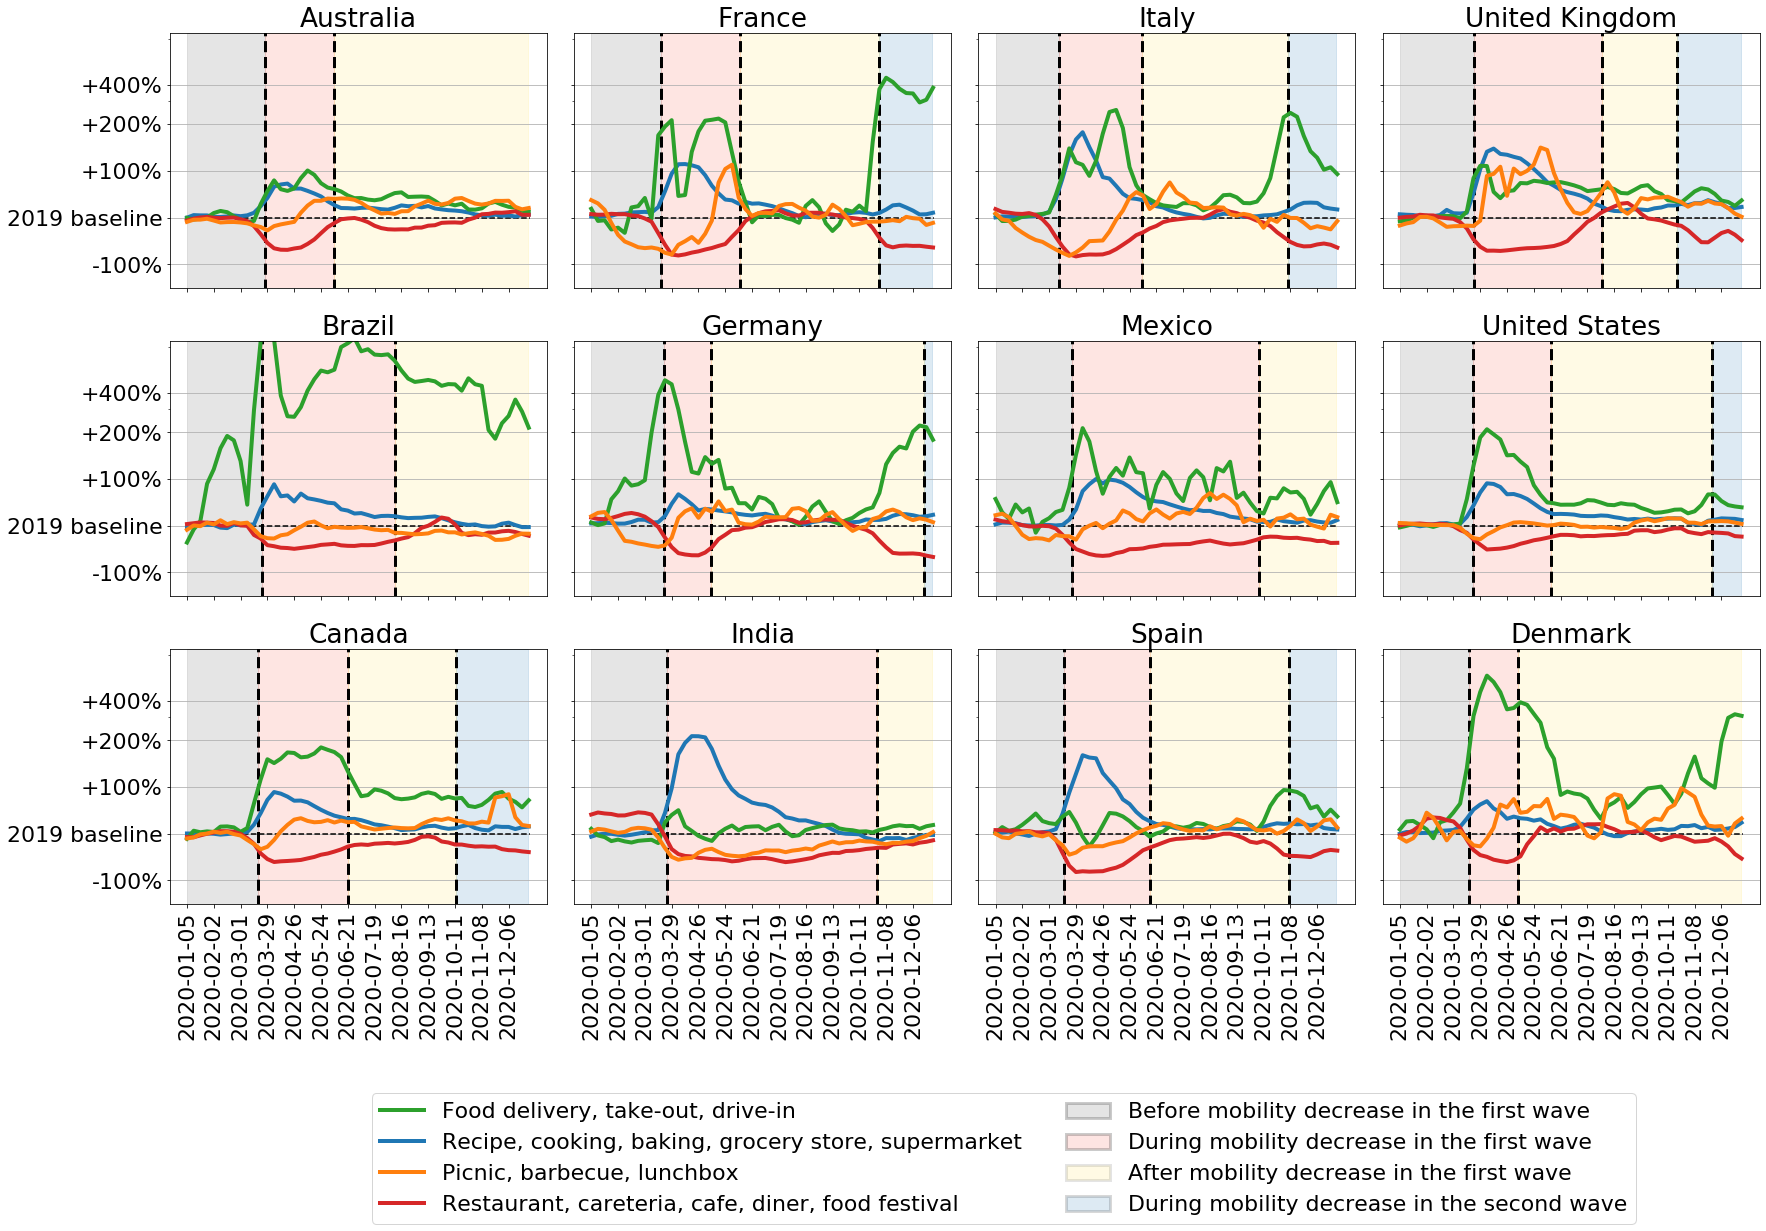

In [2]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,4, figsize= (25,15), sharex = True, sharey = True)

cnt = 0

sc = []

colors = ['tab:blue','tab:green','tab:red', 'tab:orange']
for name in list(full_names.keys()):
    
    sbplt = ax[cnt%3, math.floor(cnt/3)]
    
    for n,gr in df_agg.loc[df_agg['country'] == name].groupby('category'):
        y = (gr.iloc[0]['volume_weekly_total'].values[52:] - gr.iloc[0]['volume_weekly_total'].values[:52]) / \
                   gr.iloc[0]['volume_weekly_total'].values[:52]
        
        y = pd.DataFrame(y).rolling(3, min_periods=1).mean()
        #if n != 'Mode 4':
        sbplt.plot(np.array(range(364)[::7])-42,
                   y, linewidth =4,
                  label = dict_annotate[n], color = colors[int(n[-1])-1])
        
        sc.append(Line2D([0], [0], label= dict_annotate[n], linewidth = 4, color = colors[int(n[-1])-1]))

    
    sbplt.set_xticks((np.array(range(364)[::7])-42)[::4])
    sbplt.set_xticklabels(gr.iloc[0]['volume_weekly_total'].index[52:][::4], rotation = 90)
    
    gr = df_mobility.loc[df_mobility['country_region_code'] == name]
    
    
    
    
    #print(gr['residential_percent_change_from_baseline'].values)
    x = gr['date'].values[1:316]
    y = gr['residential_percent_change_from_baseline'].values[1:316]
    y = pd.DataFrame(y).rolling(7, min_periods=1).mean()
    
    #sbplt.plot(range(315),y, linewidth = 5, alpha = 0.8,color = 'black', label = name)
    
    sbplt.vlines(np.argmax(y >= 10), -40, 40, linewidth = 3, color = 'black', linestyle = '--')
    sbplt.vlines(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), -40, 40, linewidth = 3, color = 'black', linestyle = '--')
    
    sbplt.axvspan(-42,np.argmax(y >= 10), 
                  alpha=0.2, color = 'gray')
    
    sbplt.axvspan(np.argmax(y >= 10), np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), 
                  alpha=0.2, color = 'salmon')
    
    
    if name in ['CA','ES','GB','IT','DE','FR','US']:
        end_mob_d = np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)
        sbplt.vlines(end_mob_d+1 +np.argmax(y[end_mob_d+1:]>=10), -40, 40, linewidth = 3, color = 'black', linestyle = '--')
        
        
        sbplt.axvspan(end_mob_d+1 + np.argmax(y[end_mob_d+1:]>=10), 314, alpha=0.15, color='tab:blue')
        sbplt.axvspan(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), end_mob_d+1 + np.argmax(y[end_mob_d+1:]>=10), alpha=0.1, color='gold')
    else:
        sbplt.axvspan(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), 314, alpha=0.1, color='gold')
        
    
    cnt +=1
    sbplt.set_title(full_names[name])
    

    sbplt.hlines(0,0,316, linestyle = '--')
    sbplt.grid(axis='y')
    
    sbplt.set_yscale('symlog', basey = 3)
    sbplt.set_yticks([-1,0,1,2,4])
    sbplt.set_yticklabels(["-100%","2019 baseline","+100%","+200%","+400%"]) 

plt.tight_layout()

sbplt.set_ylim([-1.5,10])
sbplt.legend(bbox_to_anchor = (-0.2,-1), fontsize= 25)

patch_1 = mpatches.Patch(linewidth = 3,edgecolor = 'black',alpha=0.2, facecolor = 'gray', label='Before mobility decrease in the first wave')
patch_2 = mpatches.Patch(linewidth = 3,edgecolor = 'black', alpha=0.2, facecolor = 'salmon', label='During mobility decrease in the first wave')
patch_3 = mpatches.Patch(linewidth = 3,edgecolor = 'black', alpha=0.15, facecolor='tab:blue', label='During mobility decrease in the second wave')
patch_4 = mpatches.Patch(linewidth = 3,edgecolor = 'black',alpha=0.1, facecolor='gold', label='After mobility decrease in the first wave')


plt.legend(handles=[sc[1],sc[0],sc[3],sc[2],patch_1, patch_2, patch_4, patch_3], bbox_to_anchor= (0.7,-0.7), ncol = 2)

plt.savefig(FIGURES_DIR + 'modes_ts.pdf', bbox_inches='tight')

In [3]:
studied_weeks = list(df_agg.iloc[0]['volume_weekly_total'].index)[-46:]

In [4]:
mobility_ts = {}

for country, gr in df_mobility.groupby('country_region_code'):
    mobility_dict = {}
    gr = gr.iloc[1:323]
    for i in chunker(gr,7):
        mobility_dict[i.iloc[0]['date']] = (i['residential_percent_change_from_baseline'].mean())
    mobility_ts[country] = mobility_dict

In [5]:
df_events = pd.DataFrame(event_dicts)
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [6]:
entry_list_first_wave = []
entry_list_second_wave = []

for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)<=df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])

        x = x.loc[mask]
        y = list(compress(list(y.values()),mask))
        
        #print(pearsonr(x.values, y))

        entry['category'] = category
        entry['corr'] = pearsonr(x.values, y)[0]
        entry['p'] = pearsonr(x.values, y)[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        
        
    
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)>df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])
        
        x = x.loc[mask]
        y = list(compress(list(y.values()),mask))
        
        entry['corr'] = pearsonr(x.values, y)[0]
        entry['p'] = pearsonr(x.values, y)[1]
        
        entry_list_second_wave.append(entry)


df_plot_w_1 = pd.DataFrame(entry_list_first_wave)
df_plot_w_2 = pd.DataFrame(entry_list_second_wave)


In [7]:
df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)
df_plot_w_2['wave'] = ['Second wave']*len(df_plot_w_2)

order = list(df_plot_w_1.groupby('category').agg('median').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})
temp_df2 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))+1})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')
df_plot_w_2_a = df_plot_w_2.merge(temp_df2, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)
df_plot_w_2_a['category_id'] = df_plot_w_2_a['category_id'].astype(int)

In [8]:
dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

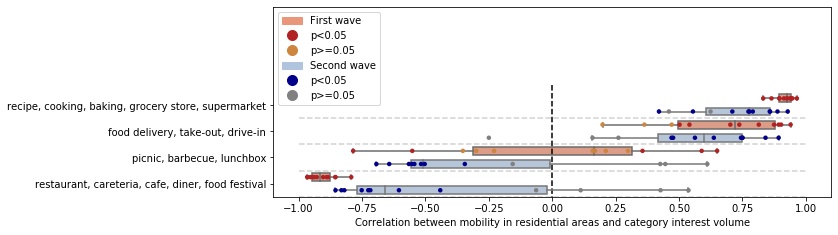

In [9]:
df_plot_w_1_a['p<0.05'] = df_plot_w_1_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')
df_plot_w_2_a['p<0.05'] = df_plot_w_2_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')

matplotlib.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize=(10,3.5))

sns.boxplot(x="corr", y="category_id", data=df_plot_w_2_a, orient = 'h', width = 0.6,
            palette=['lightsteelblue'],order=np.arange(2*29), showfliers=False)

sns.boxplot(x="corr", y="category_id", data=df_plot_w_1_a, orient = 'h',  width = 0.6,
            palette=['darksalmon'],order=np.arange(2*29), showfliers=False)

red_patch = mpatches.Patch(color='darksalmon', label='First wave')
blue_patch = mpatches.Patch(color='lightsteelblue', label='Second wave')

sc1 = Line2D([0], [0], marker='o', color='darkblue', label='p<0.05', linestyle = 'None',
                          markerfacecolor='darkblue', markersize=10)
sc2 = Line2D([0], [0], marker='o', color='firebrick', label='p<0.05', linestyle = 'None',
                          markerfacecolor='firebrick', markersize=10)
sc3 = Line2D([0], [0], marker='o', color='gray', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='gray', markersize=10)
sc4 = Line2D([0], [0], marker='o', color='peru', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='peru', markersize=10)

#plt.legend(handles=[red_patch, blue_patch])

sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_2_a, orient = 'h',
            size= 4.5, palette=['darkblue','gray'],order=np.arange(2*29), jitter = 0)

sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_1_a, orient = 'h',
            size = 4.5, palette=['firebrick','peru'], order=np.arange(2*29), jitter = 0)


plt.legend(handles=[ red_patch, sc2, sc4, blue_patch,sc1, sc3], loc = 'upper left')



for i in range(1,27*2)[::2]:
    plt.hlines(i+0.5,-1,1,linestyle ='--',color = 'lightgray')
            
             #width=0.5
            
            

plt.yticks(np.arange(2*29)[::2]+0.5, [dict_annotate[i] for i in order]);
plt.ylim([4*2-0.5, -7])
plt.vlines(0,-1,56, linestyle = '--',color = 'black')
plt.ylabel('')
plt.xlabel("Correlation between mobility in residential areas and category interest volume");

plt.savefig(FIGURES_DIR + 'corr_modes.pdf', bbox_inches='tight')

In [10]:
entry_list_first_wave = []


for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)<=df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])
        
        entry['category'] = category
        entry['corr'] = spearmanr(x.values, list(y.values()))[0]
        entry['p'] = spearmanr(x.values, list(y.values()))[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        

df_plot_w_1 = pd.DataFrame(entry_list_first_wave)


df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)

order = list(df_plot_w_1.groupby('category').agg('mean').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)

dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

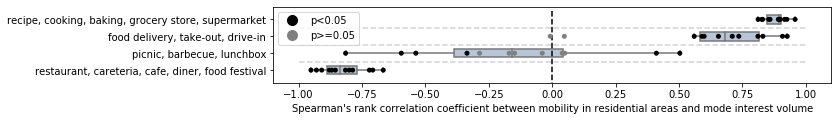

In [11]:
df_plot_w_1_a['p<0.05'] = df_plot_w_1_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')
df_plot_w_2_a['p<0.05'] = df_plot_w_2_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')

matplotlib.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize=(10,1.4))


sns.boxplot(x="corr", y="category_id", data=df_plot_w_1_a, orient = 'h',  width = 1,
            color = 'lightsteelblue', order=np.arange(2*29), showfliers=False)

red_patch = mpatches.Patch(color='darksalmon', label='First wave')
blue_patch = mpatches.Patch(color='lightsteelblue', label='Second wave')


sc1 = Line2D([0], [0], marker='o', color='black', label='p<0.05', linestyle = 'None',
                          markerfacecolor='black', markersize=10)
sc2 = Line2D([0], [0], marker='o', color='gray', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='gray', markersize=10)


sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_1_a, orient = 'h',
            size = 5, palette=['black','gray'], order=np.arange(2*29), jitter = 0)


plt.legend(handles=[sc1, sc2], loc = 'upper left', #bbox_to_anchor = (0,1)
          )



for i in range(1,6)[::2]:
    plt.hlines(i,-1,1,linestyle ='--',color = 'lightgray')
            
             #width=0.5

plt.yticks(np.arange(2*29)[::2], [dict_annotate[i] for i in order]);
plt.ylim([4*2-0.5, -1.5])
plt.vlines(0,-1,56, linestyle = '--',color = 'black')
plt.ylabel('')
plt.xlabel("Spearman's rank correlation coefficient between mobility in residential areas and mode interest volume");


plt.savefig(FIGURES_DIR + "two_waves_corr_modes.pdf", bbox_inches='tight')

In [12]:
entry_list_first_wave = []


for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)<=df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])
        
        entry['category'] = category
        entry['corr'] = pearsonr(x.values, list(y.values()))[0]
        entry['p'] = pearsonr(x.values, list(y.values()))[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        

df_plot_w_1 = pd.DataFrame(entry_list_first_wave)


df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)

order = list(df_plot_w_1.groupby('category').agg('mean').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)

dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

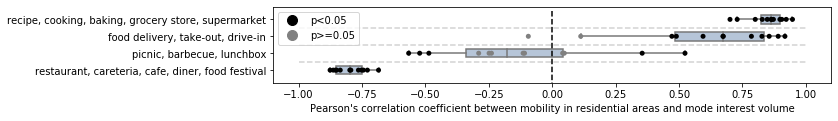

In [14]:
df_plot_w_1_a['p<0.05'] = df_plot_w_1_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')
df_plot_w_2_a['p<0.05'] = df_plot_w_2_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')

matplotlib.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize=(10,1.4))


sns.boxplot(x="corr", y="category_id", data=df_plot_w_1_a, orient = 'h',  width = 1,
            color = 'lightsteelblue', order=np.arange(2*29), showfliers=False)

red_patch = mpatches.Patch(color='darksalmon', label='First wave')
blue_patch = mpatches.Patch(color='lightsteelblue', label='Second wave')


sc1 = Line2D([0], [0], marker='o', color='black', label='p<0.05', linestyle = 'None',
                          markerfacecolor='black', markersize=10)
sc2 = Line2D([0], [0], marker='o', color='gray', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='gray', markersize=10)


sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_1_a, orient = 'h',
            size = 5, palette=['black','gray'], order=np.arange(2*29), jitter = 0)


plt.legend(handles=[sc1, sc2], loc = 'upper left', #bbox_to_anchor = (0,1)
          )



for i in range(1,6)[::2]:
    plt.hlines(i,-1,1,linestyle ='--',color = 'lightgray')
            
             #width=0.5

plt.yticks(np.arange(2*29)[::2], [dict_annotate[i] for i in order]);
plt.ylim([4*2-0.5, -1.5])
plt.vlines(0,-1,56, linestyle = '--',color = 'black')
plt.ylabel('')
plt.xlabel("Pearson's correlation coefficient between mobility in residential areas and mode interest volume");


plt.savefig(FIGURES_DIR + "appendix_pearson_corr_modes.pdf", bbox_inches='tight')